# **THE SPARK FOUNDATION**

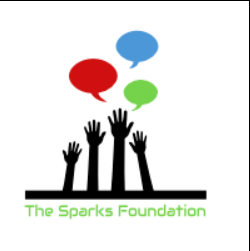

**Importing the libraries required for the task**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading data from the url provided**

In [4]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizing to find whenther their is any realtion between the data**

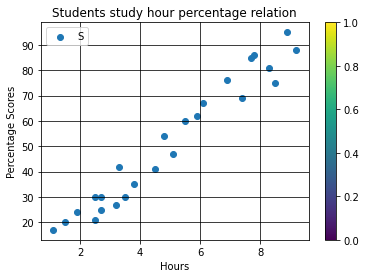

In [7]:
plt.scatter(data.Hours, data.Scores ,cmap='virdis') 
plt.legend(labels=('Scores'),loc='upper left')
plt.grid(color='k',ls='solid',lw=0.75) #here ls measn line style  n lw mean line width
plt.title("Students study hour percentage relation")
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.colorbar()
plt.show()

**From the graph we can see positive linear realtion between number of hours studied and the percentage**

**Data preprocessing**

1.   Divide the data into attributes(inputs) and labels(outputs)


*We need to divide the dataset into attrobutes because X is what your model uses to make a prediction, y is the right answer you want it to give*

In [8]:
X= data.iloc[:, :-1].values
y= data.iloc[:, 1].values
print("Attributes:")
print(X)
print("\nLables:")
print(y)

Attributes:
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

Lables:
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


   **Train test split for the datset** 



1.  Its **a technique for evaluating the performance of a machine learning algorithm on new data**.
1.   The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the **training dataset**. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the **test dataset**.





In [40]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Training your dataset by using algorithms**

In [10]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the line**

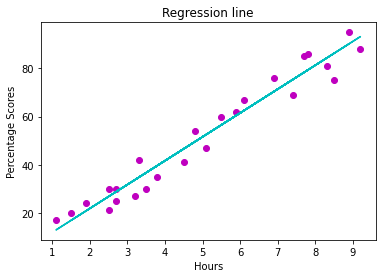

In [44]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("Regression line")
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.scatter(X, y,color='m')
plt.plot(X, line, color='c');
plt.show()

**Making predictions**

In [13]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


***Although we made predicitons but we need to comapre it with actual dataset***

In [54]:
y_pred=regressor.predict(X_test)
df= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**PLotting the line for actual vs predicted values**

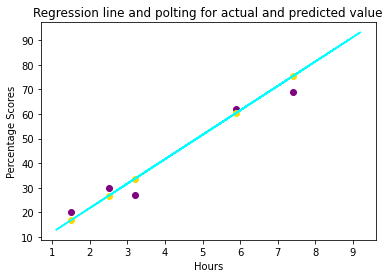

In [60]:
plt.title("Regression line and polting for actual and predicted value")
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.scatter(X_test,y_test,color='purple')
plt.scatter(X_test,y_pred,color='gold')
plt.plot(X_train,regressor.predict(X_train),color='aqua')
plt.show()

**Predict the percentage of an student based on the no of study hours**

In [17]:
hrs=[9.25]
pred = regressor.predict([hrs])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a particular dataset.

In [18]:
from sklearn import metrics

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Square error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Square error: 21.598769307217456


**Here we can see that we got mean absolute error of 4.18**